# Transient Growth
We have seen that application of a short burst of random noise perturbation leads initially to what looks like a burst of energy, followed by the asymptotic, either growth or attenuation of the perturbation. The long time behavior is dictated by the exponential evolution, and dominated by the leading eigen value. The short time (initial) amplification results from the algebraic mechanism that results from superposition of two exponentials (see the lecture). Here we will try to experiment with the problem we examined in the lecture. One day we might even add some nonlinearities to it to make things more interesting.

Let us consider:
$$
\frac{d}{dt} \begin{bmatrix} v \\ \eta \end{bmatrix} =
\begin{bmatrix} -1/Re ~~ 0 \\ 1  ~~ -2/Re \end{bmatrix} \begin{bmatrix} v \\ \eta \end{bmatrix}
$$

with initial conditions:
$$
\cases{v(0) = v_0 \\ \eta(0)=\eta_0}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D # Produces 3D axes setting
from scipy.integrate import odeint
from matplotlib import cm

Our problem is nice and linear, and most of all has an analytic solution, which is easy to develop (right?). Here it is:
$$
\begin{bmatrix} v \\ \eta \end{bmatrix} = v_0\begin{bmatrix} 1 \\ Re \end{bmatrix}e^{-t/Re} +
(\eta_0-v_0 Re)\begin{bmatrix} 0 \\ 1 \end{bmatrix} e^{-2t/Re}
$$

Because we can we will solve it numerically:

In [178]:
Re=1

In [179]:
def lor_rhs(x, t):
    return [ -1.0/Re * x[0],
             1.0 * x[0] - 2.0/Re * x[1]
           ]

In [192]:
t = np.linspace(0, 10, 10000)  # one thousand time steps

x0 = [100, 0.01]
xt1 = odeint(lor_rhs, x0, t)
xt1 = xt1.transpose()

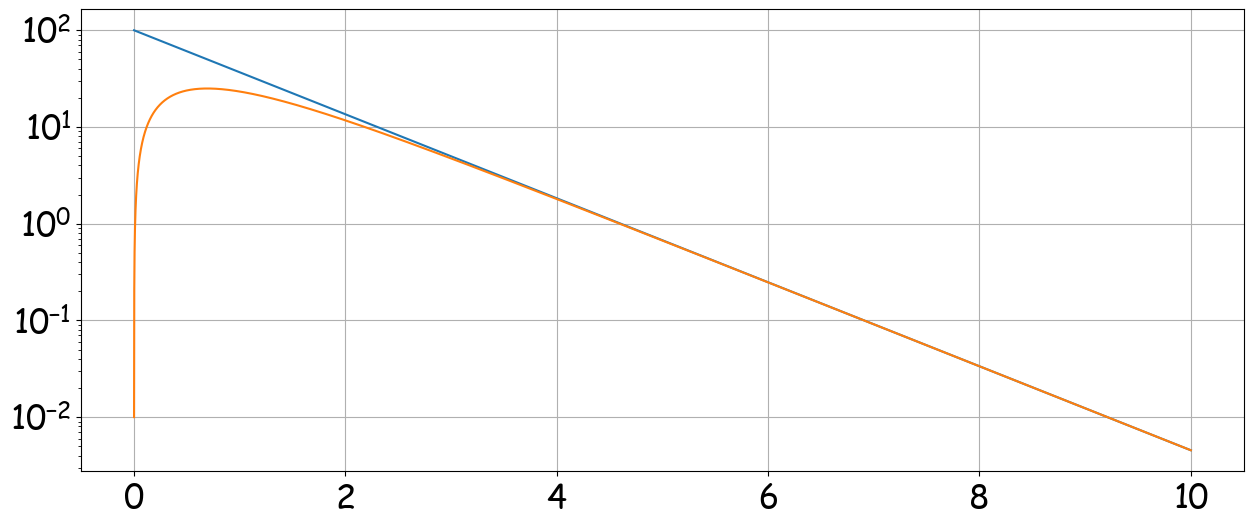

In [193]:
%matplotlib inline
f = plt.figure(figsize=(15,6)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(t, xt1[0])
plt.plot(t, xt1[1])

plt.grid()
plt.yscale('log')
# plt.xlim(0,50)

## Nonorthogonal vectors
Let us try to examine the orthogonality of eigenvectors and how it manifests in the transient (algebraic) behavior, which we have seen as a burst.  
Our problem has two of them, corresponding to appropriate eigenvalues:

$$
\lambda_1=-1/Re \text{ with } u_1 = \frac{1}{\sqrt{1+Re^2}}\begin{bmatrix} 1 \\ Re \end{bmatrix}
$$
and
$$
\lambda_2=-2/Re \text{ with } u_2 = \begin{bmatrix} 0 \\ 1 \end{bmatrix}
$$

In a general case, eigenvectors span a base in $R^n$, this means we can represent any $R^n$ vector using $n$ eigenvectors (note: Eigenvectors must remain linearly independent, or must not to be parallel).  
This means we can represent some initial condition vector as:
$$
w=\sum a_i u_i
$$
We have:

In [214]:
u1 = np.array([1.0,Re])
u1 /= np.linalg.norm(u1)
u2 = np.array([0.0,1.0])
a1=100*np.sqrt(2)
a2=-99.99
x0 = a1*u1+a2*u2

In [215]:
print(u1,u2)
print(x0)

[0.70710678 0.70710678] [0. 1.]
[1.e+02 1.e-02]


In [216]:
t = np.linspace(0, 10, 10000)  # one thousand time steps

xt1 = odeint(lor_rhs, x0, t)
xt1 = xt1.transpose()

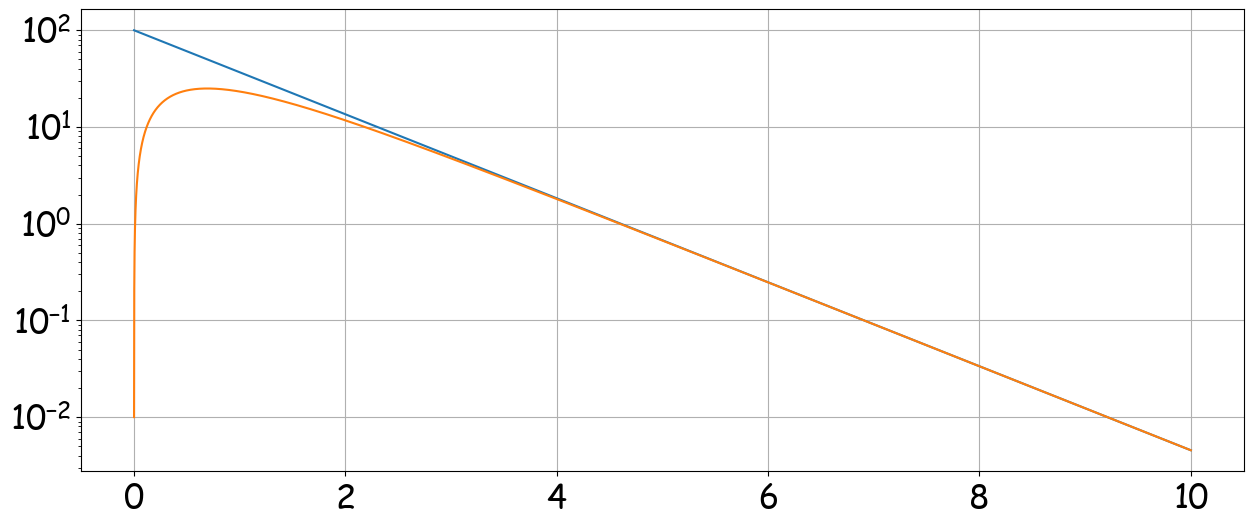

In [217]:
%matplotlib inline
f = plt.figure(figsize=(15,6)) # figure size
font = {'family' : 'Comic Sans MS', 'weight' : 'normal', 'size'   : 24} #larger font I like
plt.rc('font', **font)

plt.plot(t, xt1[0])
plt.plot(t, xt1[1])

plt.grid()
plt.yscale('log')
# plt.xlim(0,50)

Let see how our initial vector evolved.

The plan is to reproduce the figure, standard for linear TG and illustrating the consequence of the lack of orthogonality:

![fishy](tg.png)

This figure s from the Nektar++ User Manual compiled September 2022.

Here comes the remaining

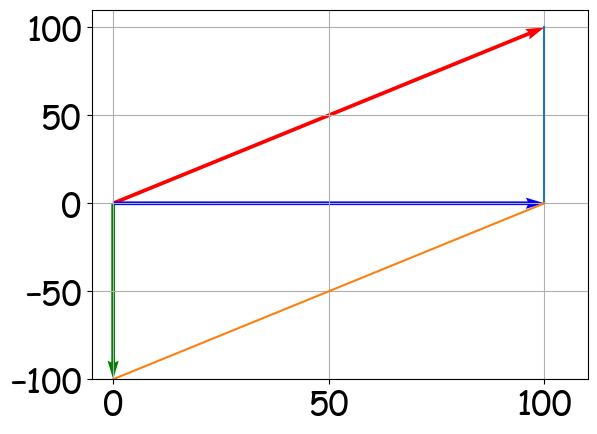

In [263]:
ax = plt.gca()
ax.quiver([0,0,0], [0,0,0], 
          [a1*u1[0], a2*u2[0], x0[0]], [a1*u1[1], a2*u2[1], x0[1]],
          angles='xy', scale_units='xy', scale=1, color=['r','g','b'])
plt.plot([x0[0],a1*u1[0]], [x0[1],a1*u1[1]])
plt.plot([x0[0],a2*u2[0]], [x0[1],a2*u2[1]])

ax.set_xlim([-5, 110])
ax.set_ylim([-100, 110])
plt.grid()